title: Motorcycle crash data analysis with GAM

author: Robert A. Stevens

date: 2024-02-05

Show how to use PyGAM to analyze the `mcycle` data set, which contains measurement of acceleration of a crash-test dummy head during a motorcycle crash. It contains measurements of acceleration (g) in the `accel` column and time (milliseconds) in the `times` column.

Source: https://cran.r-project.org/web/packages/MASS/MASS.pdf

In [149]:
# ! pip3 install pandas
# ! pip3 install seaborn
# ! pip3 install matplotlib
# ! pip3 install pygam
# ! pip3 install statsmodels

## Import

In [150]:
# import packages

from pygam import f
from pygam import LinearGAM
from pygam import s

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [151]:
# import data

mcycle = pd.read_csv("mcycle.csv")
mcycle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   times   133 non-null    float64
 1   accel   133 non-null    float64
dtypes: float64(2)
memory usage: 2.2 KB


In [152]:
# Examine the mcycle data frame
mcycle.head()

,times,accel
0,2.4,0.0
1,2.6,-1.3
2,3.2,-2.7
3,3.6,0.0
4,4.0,-2.7


## Tidy

N/A

## Transform

In [153]:
X = mcycle["times"].values
y = mcycle["accel"].values

In [154]:
mcycle.describe().T

,count,mean,std,min,25%,50%,75%,max
times,133.0,25.178947,13.132063,2.4,15.6,23.4,34.8,57.6
accel,133.0,-25.545865,48.322050,-134.0,-54.9,-13.3,0.0,75.0


## Visualize

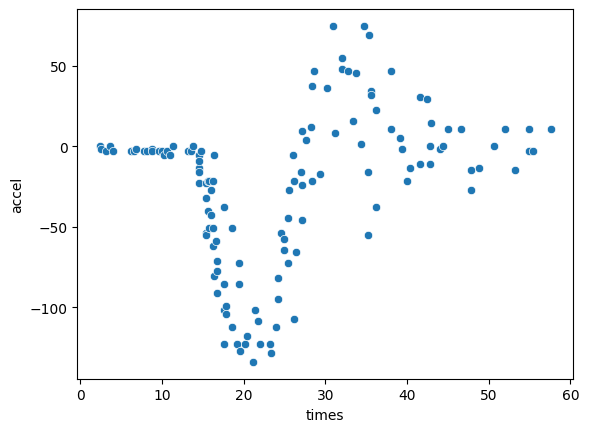

In [155]:
sns.scatterplot(data=mcycle, x="times", y="accel")
plt.show()

## Model 

### Fit a linear model

In [156]:
# Fit a linear model
lm_model = sm.OLS(y, X)
lm_fit = lm_model.fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.087
Model:                            OLS   Adj. R-squared (uncentered):              0.080
Method:                 Least Squares   F-statistic:                              12.60
Date:                Sun, 28 Jan 2024   Prob (F-statistic):                    0.000534
Time:                        14:56:42   Log-Likelihood:                         -714.41
No. Observations:                 133   AIC:                                      1431.
Df Residuals:                     132   BIC:                                      1434.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.5670      0.160     -3.550      0.001      -0.883      -0.251
==============================================================================
Omnibus:                        4.824   Durbin-Watson:                   0.391
Prob(Omnibus):                  0.090   Jarque-Bera (JB):                4.603
Skew:                          -0.400   Prob(JB):                        0.100
Kurtosis:                       2.562   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

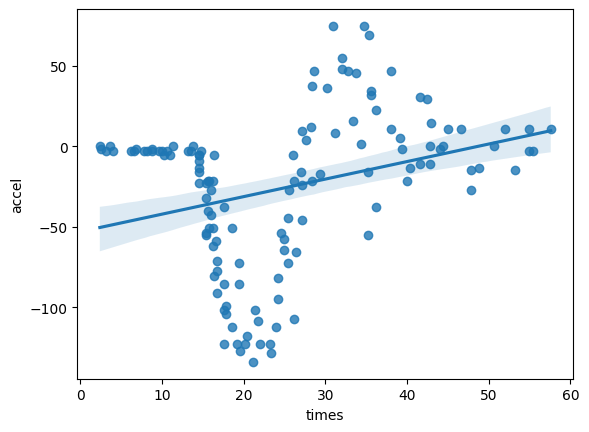

In [157]:
sns.regplot(data=mcycle, x="times", y="accel")
plt.show()

In [158]:
mcycle["lm_pred"] = lm_fit.fittedvalues
mcycle["lm_residuals"] = mcycle["accel"] - mcycle["lm_pred"]
mcycle.head()

,times,accel,lm_pred,lm_residuals
0,2.4,0.0,-1.360899,1.360899
1,2.6,-1.3,-1.474307,0.174307
2,3.2,-2.7,-1.814532,-0.885468
3,3.6,0.0,-2.041348,2.041348
4,4.0,-2.7,-2.268165,-0.431835


In [159]:
mcycle.describe().T

,count,mean,std,min,25%,50%,75%,max
times,133.0,25.178947,13.132063,2.400000,15.600000,23.400000,34.800000,57.600000
accel,133.0,-25.545865,48.322050,-134.000000,-54.900000,-13.300000,0.000000,75.000000
lm_pred,133.0,-14.277501,7.446421,-32.661573,-19.733034,-13.268764,-8.845843,-1.360899
lm_residuals,133.0,-11.268364,51.027220,-121.978726,-43.423970,0.815655,23.649813,94.733034


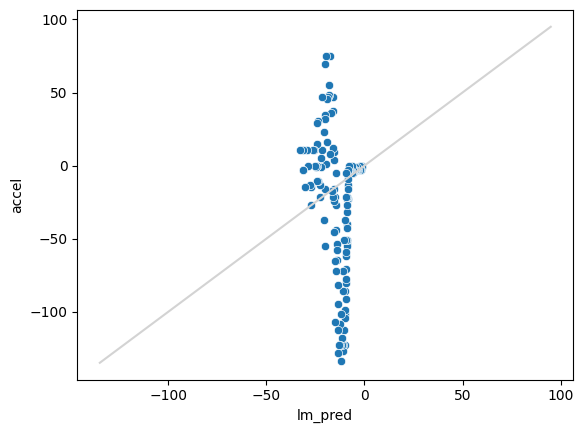

In [160]:
sns.scatterplot(data=mcycle, x="lm_pred", y="accel")
plt.plot([-135.0, 95.0], [-135.0, 95.0], color="lightgray")
plt.show()

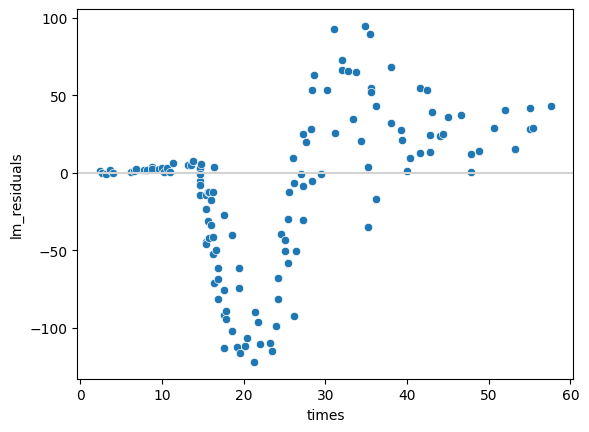

In [161]:
sns.scatterplot(data=mcycle, x="times", y="lm_residuals")
plt.axhline(y = 0.0, color="lightgray") 
plt.show()

### Fit a GAM - default

In [162]:
gam_model = LinearGAM(s(0))
gam_fit = gam_model.fit(X, y)
gam_fit.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     10.2425
Link Function:                     IdentityLink Log Likelihood:                                  -954.5558
Number of Samples:                          133 AIC:                                             1931.5965
                                                AICc:                                             1933.876
                                                GCV:                                              605.0521
                                                Scale:                                            521.8021
                                                Pseudo R-Squared:                                   0.7922
Feature Function                  Lam

/var/folders/0c/wp1qw1z126v3ks75ls3g3zt80000gn/T/ipykernel_33141/735375198.py:3: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_fit.summary()


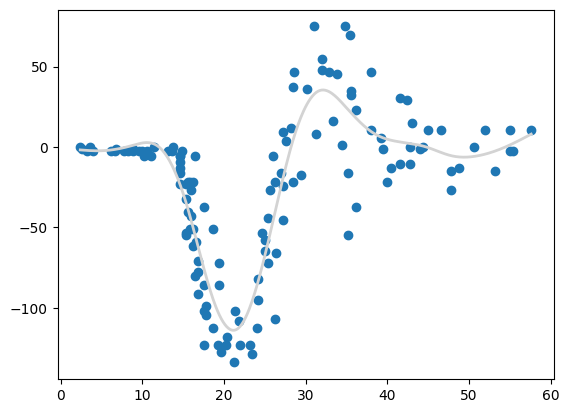

In [163]:
XX = gam_fit.generate_X_grid(term=0, n=500)

plt.scatter(X, y)
plt.plot(XX, gam_fit.predict(XX), color="lightgray", linewidth=2)
plt.show()

In [164]:
mcycle["gam_pred"] = gam_fit.predict(mcycle["times"])
mcycle["gam_residuals"] = mcycle["accel"] - mcycle["gam_pred"] 
mcycle.head()

,times,accel,lm_pred,lm_residuals,gam_pred,gam_residuals
0,2.4,0.0,-1.360899,1.360899,-1.783659,1.783659
1,2.6,-1.3,-1.474307,0.174307,-1.865145,0.565145
2,3.2,-2.7,-1.814532,-0.885468,-2.084369,-0.615631
3,3.6,0.0,-2.041348,2.041348,-2.199966,2.199966
4,4.0,-2.7,-2.268165,-0.431835,-2.282229,-0.417771


In [165]:
mcycle.describe().T

,count,mean,std,min,25%,50%,75%,max
times,133.0,2.517895e+01,13.132063,2.400000,15.600000,23.400000,34.800000,57.600000
accel,133.0,-2.554586e+01,48.322050,-134.000000,-54.900000,-13.300000,0.000000,75.000000
lm_pred,133.0,-1.427750e+01,7.446421,-32.661573,-19.733034,-13.268764,-8.845843,-1.360899
lm_residuals,133.0,-1.126836e+01,51.027220,-121.978726,-43.423970,0.815655,23.649813,94.733034
gam_pred,133.0,-2.554586e+01,41.080416,-113.964836,-53.704924,-7.385069,2.536256,35.478909
gam_residuals,133.0,-1.180317e-09,22.028759,-78.140150,-12.240521,-0.615631,13.223897,49.509772


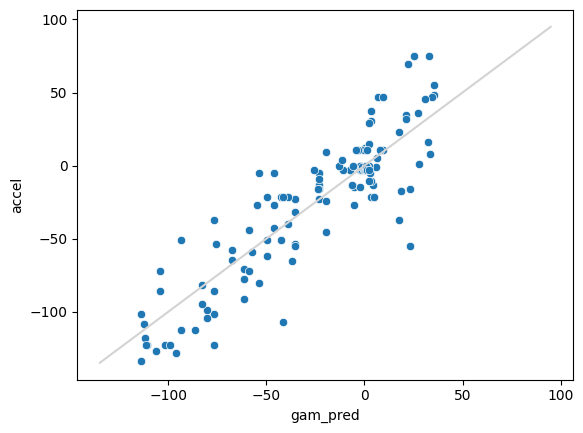

In [166]:
sns.scatterplot(data=mcycle, x="gam_pred", y="accel")
plt.plot([-135.0, 95.0], [-135.0, 95.0], color="lightgray")
plt.show()

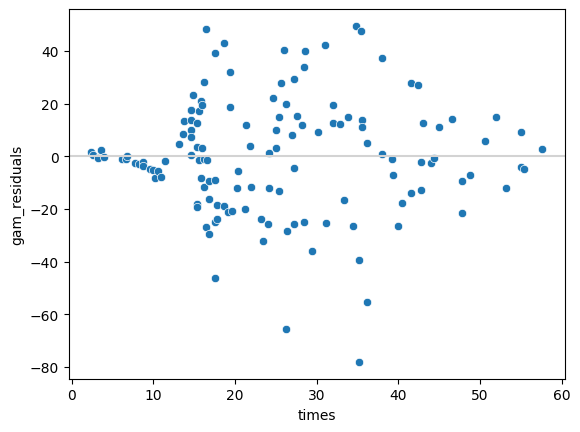

In [167]:
sns.scatterplot(data=mcycle, x="times", y="gam_residuals")
plt.axhline(y = 0.0, color="lightgray") 
plt.show()

### Fit a GAM - gridsearch

In [168]:
X = X.reshape(133, 1)

In [176]:
gam_grid = LinearGAM().gridsearch(X, y)
gam_grid.summary()

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00
 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     11.8135
Link Function:                     IdentityLink Log Likelihood:                                  -952.2409
Number of Samples:                          133 AIC:                                             1930.1088
                                                AICc:                                            1933.0789
                                                GCV:                                              609.3811
                                                Scale:                                            512.7965
                                                Pseudo R-Squared:                                   0.7984
Feature Function                  Lam

/var/folders/0c/wp1qw1z126v3ks75ls3g3zt80000gn/T/ipykernel_33141/569488064.py:2: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_grid.summary()


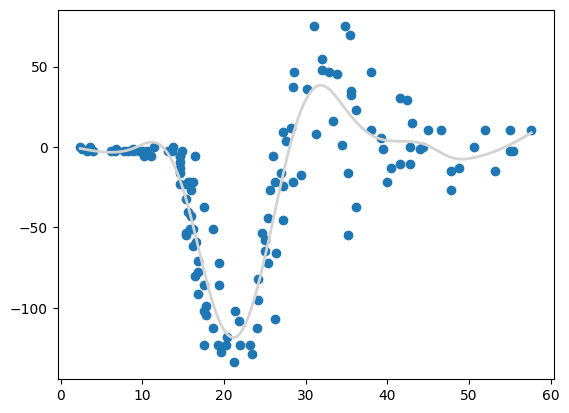

In [170]:
XX = gam_grid.generate_X_grid(term=0, n=500)

plt.scatter(X, y)
plt.plot(XX, gam_grid.predict(XX), color="lightgray", linewidth=2)
plt.show()

In [171]:
mcycle["gam_grid_pred"] = gam_grid.predict(mcycle["times"])
mcycle["gam_grid_residuals"] = mcycle["accel"] - mcycle["gam_grid_pred"] 
mcycle.head()

,times,accel,lm_pred,lm_residuals,gam_pred,gam_residuals,gam_grid_pred,gam_grid_residuals
0,2.4,0.0,-1.360899,1.360899,-1.783659,1.783659,-0.877405,0.877405
1,2.6,-1.3,-1.474307,0.174307,-1.865145,0.565145,-1.073149,-0.226851
2,3.2,-2.7,-1.814532,-0.885468,-2.084369,-0.615631,-1.640856,-1.059144
3,3.6,0.0,-2.041348,2.041348,-2.199966,2.199966,-1.993901,1.993901
4,4.0,-2.7,-2.268165,-0.431835,-2.282229,-0.417771,-2.318057,-0.381943


In [172]:
mcycle.describe().T

,count,mean,std,min,25%,50%,75%,max
times,133.0,2.517895e+01,13.132063,2.400000,15.600000,23.400000,34.800000,57.600000
accel,133.0,-2.554586e+01,48.322050,-134.000000,-54.900000,-13.300000,0.000000,75.000000
lm_pred,133.0,-1.427750e+01,7.446421,-32.661573,-19.733034,-13.268764,-8.845843,-1.360899
lm_residuals,133.0,-1.126836e+01,51.027220,-121.978726,-43.423970,0.815655,23.649813,94.733034
gam_pred,133.0,-2.554586e+01,41.080416,-113.964836,-53.704924,-7.385069,2.536256,35.478909
gam_residuals,133.0,-1.180317e-09,22.028759,-78.140150,-12.240521,-0.615631,13.223897,49.509772
gam_grid_pred,133.0,-2.554586e+01,42.172357,-118.442351,-52.873973,-7.438482,3.315833,38.336919
gam_grid_residuals,133.0,-1.169746e-09,21.697652,-76.341357,-12.792181,-0.239032,12.832337,50.910882


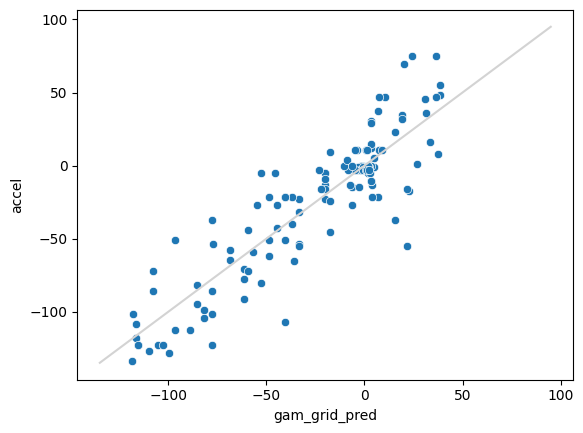

In [173]:
sns.scatterplot(data=mcycle, x="gam_grid_pred", y="accel")
plt.plot([-135.0, 95.0], [-135.0, 95.0], color="lightgray")
plt.show()

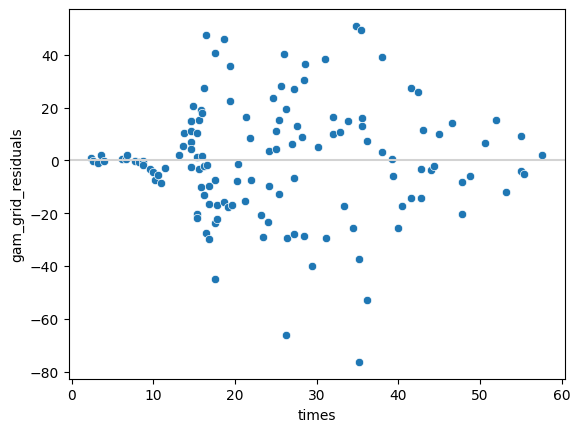

In [174]:
sns.scatterplot(data=mcycle, x="times", y="gam_grid_residuals")
plt.axhline(y = 0.0, color="lightgray") 
plt.show()

## Communicate

Metrics comparison

```
Model        Log-Likelihood AIC  R-Squared
------------ -------------- ---- ---------
Linear       -714.41        1431 0.087
GAM default  -954.56        1932 0.792
GAM grid     -952.24        1930 0.798                                  
```

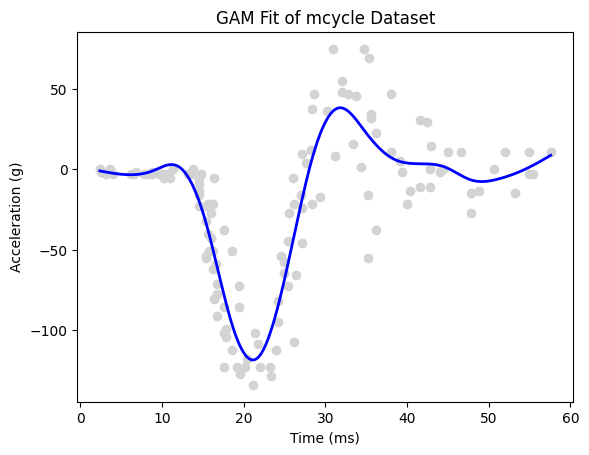

In [175]:
plt.scatter(X, y, color="lightgray")
plt.plot(XX, gam_grid.predict(XX), color="blue", linewidth=2)
plt.title("GAM Fit of mcycle Dataset")
plt.xlabel("Time (ms)")
plt.ylabel("Acceleration (g)")
plt.show()